#  Preprocess language sentence data

Since the whole raw data is too large to read into memory and build the model, here we preprocess the sentence data in this part. Here are two keys in the step:

#### 1.  To balance the data, we control the number of sentences for each language
#### 2. Split the data into train data and validation data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import matplotlib.pyplot as plt
import pickle
import os
print(os.listdir("../input"))

['de_sentence.pkl', 'lt_sentence.pkl', 'pl_sentence.pkl', 'en_sentence.pkl', 'lv_sentence.pkl', 'bg_sentence.pkl', 'nl_sentence.pkl', 'es_sentence.pkl', 'da_sentence.pkl', 'ro_sentence.pkl', 'et_sentence.pkl', 'cs_sentence.pkl', 'sl_sentence.pkl', 'sv_sentence.pkl', 'fi_sentence.pkl', 'pt_sentence.pkl', 'hu_sentence.pkl', 'sk_sentence.pkl', 'fr_sentence.pkl', 'it_sentence.pkl', 'el_sentence.pkl']


Here are the abbreviation labels for the 21 European languages

In [2]:
labels = ['bg', 'cs', 'da', 'de', 'el', 'en', 'es', 'et', 
          'fi', 'fr', 'hu', 'it', 'lt', 'lv', 'nl', 'pl', 
          'pt', 'ro', 'sk', 'sl', 'sv']

# read the sentence data for each language
language_sentence = {}
for i in labels:
    f = open('../input/' + i + '_sentence.pkl','rb')
    tmp = pickle.load(f)
    language_sentence[i] = tmp
    f.close()
    print('Finish', i)

Finish bg
Finish cs
Finish da
Finish de
Finish el
Finish en
Finish es
Finish et
Finish fi
Finish fr
Finish hu
Finish it
Finish lt
Finish lv
Finish nl
Finish pl
Finish pt
Finish ro
Finish sk
Finish sl
Finish sv


Here we first compute the number of sentences and the average length of sentences in each language.

In [3]:
random.seed(0)
num_sentence = np.array([len(language_sentence[i]) for i in labels])
sentence_length = [[len(j) for j in language_sentence[i]] for i in labels]
mean_sentence_length = [np.array(i).mean() for i in sentence_length]

Now we make a plot of the number of sentences and the average length of sentences for each language.

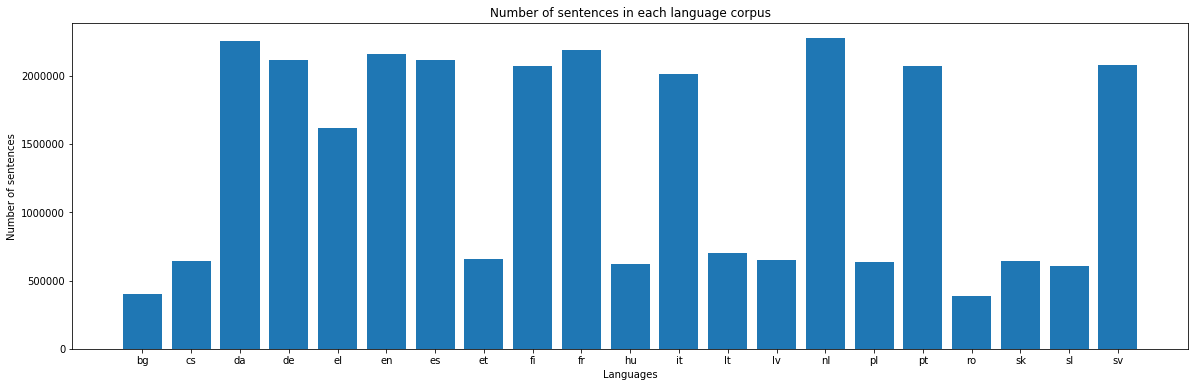

The language with minimum sentences: ro 383742


In [4]:
fig = plt.figure(figsize=(20,6))
plt.bar(labels, num_sentence)
plt.xlabel("Languages")
plt.ylabel("Number of sentences")
plt.title("Number of sentences in each language corpus")
plt.show()
print('The language with minimum sentences:',labels[np.argmin(num_sentence)], min(num_sentence))

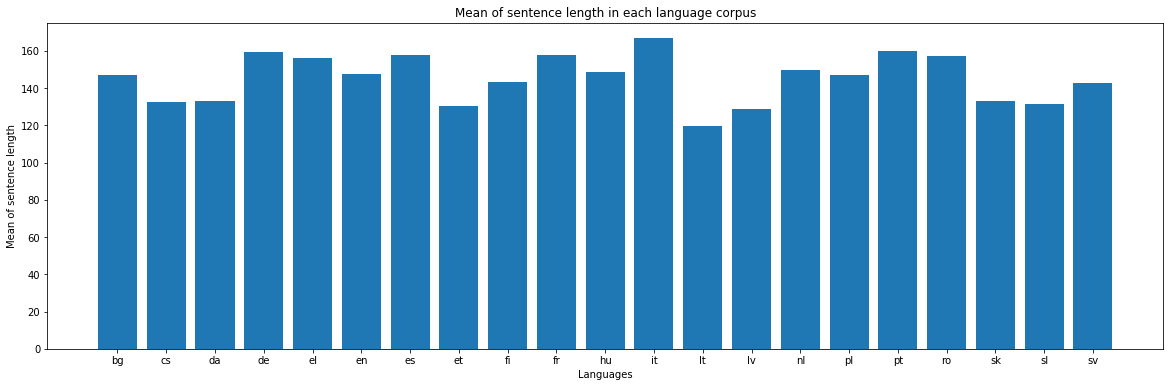

In [5]:
fig = plt.figure(figsize=(20,6))
plt.bar(labels, mean_sentence_length)
plt.xlabel("Languages")
plt.ylabel("Mean of sentence length")
plt.title("Mean of sentence length in each language corpus")
plt.show()

We can see the raw data is imbalanced for each language and the language with minimum number of sentences is Romanian (383742 sentences). Here considering the limited memoery, we only choose 50000 sentences randomly from each language. And it seems there is no large difference between the average sentence length of the 21 languages corpus, thus we don't deal with it.

In [6]:
for i in labels:
    language_sentence[i] = list(language_sentence[i])

choose_sentence = 50000
random.seed(0)
for i in labels:
    language_sentence[i] = random.sample(language_sentence[i],choose_sentence)

We store the preprocessed sentence data in the language_sentence.pkl file

In [7]:
f = open('language_sentence.pkl','wb')
pickle.dump(language_sentence, f)
f.close()

To train and evaluate the detection model, we split the `50000 * 21 = 1050000` sentences into train and validation part. 80% of the full dataset is train data and 20% of the full dataset is validation data, which means we have `50000 * 0.8 * 21 = 840000` sentences in the train data and `50000 * 0.2 * 21 = 21000` sentences in the test data.

In [8]:
from sklearn.model_selection import train_test_split
data = {}
data['train_x'] = []
data['train_y'] = []
data['val_x'] = []
data['val_y'] = []

random.seed(0)
for i in labels:
    x_train, x_test, y_train, y_test = train_test_split(language_sentence[i], [i]*len(language_sentence[i]), random_state = 0, test_size = 0.2)
    data['train_x'].extend(x_train)
    data['train_y'].extend(y_train)
    data['val_x'].extend(x_test)
    data['val_y'].extend(y_test)

We store the train and validation dataset in the train_validation_data.pkl file

In [9]:
f = open('train_validation_data.pkl','wb')
pickle.dump(data, f)
f.close()